In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

#splitting
from sklearn.model_selection import train_test_split

#imputer
from sklearn.impute import SimpleImputer

#scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, KBinsDiscretizer, PolynomialFeatures

#encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import category_encoders as ce



#feature_selection
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, f_classif,SelectFromModel, RFE, SequentialFeatureSelector

#resampling
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NeighbourhoodCleaningRule, NearMiss


#preprocessing
from sklearn.compose import ColumnTransformer

#model
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression


#tuning model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score

#pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline



#metric
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,PrecisionRecallDisplay, RocCurveDisplay, roc_auc_score ,classification_report, mean_squared_error, mean_absolute_error, recall_score, f1_score, confusion_matrix
#feature Importance Shap
import shap

#pickle
import pickle

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [79]:
# pwd

In [80]:
# /Users/andyhermawan/Documents/Unindra/Konsinyering/Machine_Learning/Klasifikasi/model_propensity.pkl

# Baca Data

In [81]:
# read dataset
df =sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Cek Type Data

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Cek Statistik Deskriptif

In [83]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [84]:
df.describe(include=object)

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


## Preprocessing

### Missing value

In [85]:
df.drop('deck',axis=1,inplace=True)
df.dropna(inplace=True)
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

Isi dengan rata-rata

In [86]:
# # Membuat objek SimpleImputer dengan strategi mean
# imputer = SimpleImputer(strategy='mean')

# # Kolom yang ingin diisi dengan rata-rata
# missing_column = ['Usia']

# # Mengisi missing values hanya pada kolom yang dipilih
# df[missing_column] = imputer.fit_transform(df[missing_column])


In [87]:
# df.isna().sum()

sudah tidak ada yang missing

### Scaling

In [88]:
# # Inisialisasi RobustScaler
# scaler = RobustScaler()

# # Kolom numerik yang ingin di-scale
# numeric_columns = ['Usia','Gaji']

# # Melakukan scaling hanya pada kolom numerik
# df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# df.head()

fitur numerik sudah terscale semua

In [89]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Kolom kategorikal yang ingin di-encode
categorical_columns = df.select_dtypes(exclude='number').columns

# Melakukan one-hot encoding pada kolom kategorikal
encoded = encoder.fit_transform(df[categorical_columns])

# Membuat DataFrame untuk hasil encoding
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_columns))

display(df,encoded_df)
# Menggabungkan kembali dengan DataFrame asli, tanpa kolom kategorikal asli
df = pd.concat([df.drop(columns=categorical_columns).reset_index(drop=True), encoded_df], axis=1)

# Tampilkan DataFrame hasil encoding
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,adult_male_True,embark_town_Queenstown,embark_town_Southampton,alive_yes,alone_True
0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
708,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
709,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
710,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,adult_male_True,embark_town_Queenstown,embark_town_Southampton,alive_yes,alone_True
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


## Definisikan Fitur dan Label

In [90]:
X = df.drop(columns=['survived','alive_yes'])  # Fitur (independent variables)
y = df['survived']  # Target (dependent variable)

In [91]:
df.isna().sum()

survived                   0
pclass                     0
age                        0
sibsp                      0
parch                      0
fare                       0
sex_male                   0
embarked_Q                 0
embarked_S                 0
class_Second               0
class_Third                0
who_man                    0
who_woman                  0
adult_male_True            0
embark_town_Queenstown     0
embark_town_Southampton    0
alive_yes                  0
alone_True                 0
dtype: int64

## Split Data

In [92]:
# Split data menjadi training dan testing set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)


## Modelling with KNN

In [93]:
#buat model
knn=KNeighborsClassifier()

#fit/latih model
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [94]:
#predict ke data test
y_pred_test_knn=knn.predict(X_test)

In [95]:
# pd.DataFrame(y_pred_test_knn)

In [96]:
#cek MAE
accuracy_score(y_test,y_pred_test_knn)

0.6783216783216783

## Modelling with Decision Tree

In [97]:
#buat model
tree=DecisionTreeClassifier()
#fit/latih model
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [98]:
#predict ke data test
y_pred_test_tree=tree.predict(X_test)

In [99]:
#cek MAE
accuracy_score(y_test,y_pred_test_tree)

0.6923076923076923

## Modelling with Random Forest

In [100]:
#buat model
xgb=XGBClassifier()
#fit/latih model
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [101]:
#predict ke data test
y_pred_test_rf=rf.predict(X_test)

NameError: name 'rf' is not defined

In [102]:
#cek MAE
accuracy_score(y_test,y_pred_test_rf)

NameError: name 'y_pred_test_rf' is not defined

## Modelling with Tensorflow Keras

In [103]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Inisialisasi model Sequential
tensor = Sequential()

# Tambahkan layer pertama dengan 64 neuron, fungsi aktivasi 'relu', dan input sesuai jumlah fitur
tensor.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

# Tambahkan Dropout untuk regularisasi
tensor.add(Dropout(0.5))

# Tambahkan layer kedua dengan 64 neuron dan fungsi aktivasi 'relu'
tensor.add(Dense(64, activation='relu'))

# Tambahkan Dropout lagi untuk regularisasi
tensor.add(Dropout(0.5))

# Tambahkan output layer dengan 1 neuron dan fungsi aktivasi 'sigmoid' untuk binary classification
tensor.add(Dense(1, activation='sigmoid'))

# Kompilasi model dengan optimizer 'adam', loss function 'binary_crossentropy', dan metric 'accuracy'
tensor.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Tampilkan ringkasan model
#fit/latih model
tensor.fit(X_train,y_train)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - accuracy: 0.5028 - loss: 3.6697


In [104]:
#predict ke data test
y_pred_test_tf_keras=np.where(tensor.predict(X_test)>0.5,1,0)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [105]:
#cek MAE
accuracy_score(y_test,y_pred_test_tf_keras)

0.6503496503496503

Model terbaik : `XGBoost`

## Hypertuning Parameter

In [106]:
# Membagi data menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menyusun parameter grid untuk GridSearchCV
param_grid = {
    'n_estimators': [50, 100 ],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

# Membuat model Random Forest
xgb = XGBClassifier()

# Menerapkan GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)




Fitting 3 folds for each of 36 candidates, totalling 108 fits


/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:54:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:54:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:54:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:54:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parame

Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:54:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:54:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:54:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/co

/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:54:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:54:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:54:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:54:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parame

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [107]:
# Menampilkan hasil terbaik
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 0.81


In [108]:
# Menguji model terbaik pada data test
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)


print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_pred)))



Accuracy on test set: 0.79


## Feature Importance

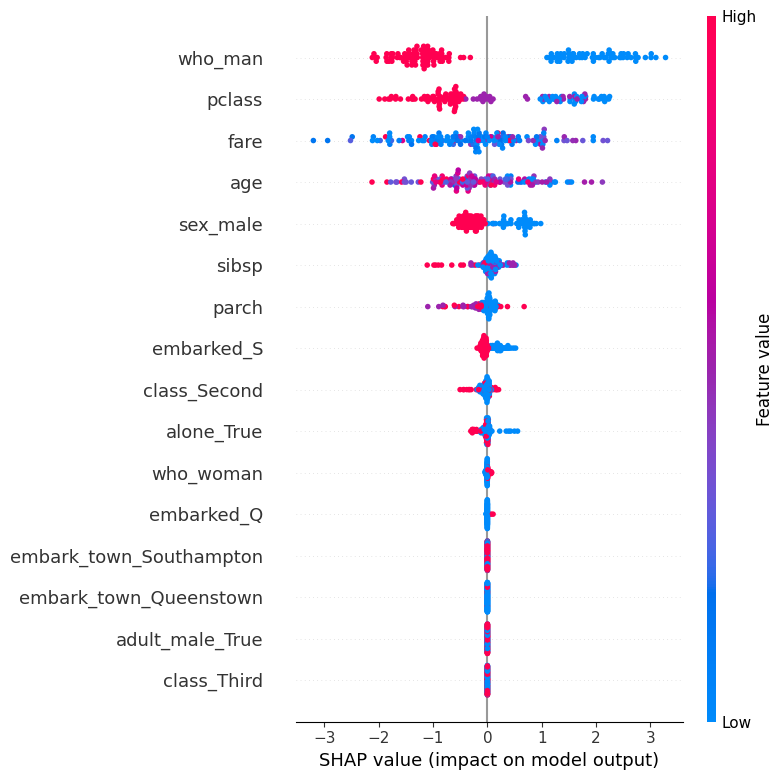

In [109]:
# Menghitung SHAP values
explainer = shap.TreeExplainer(best_rf,model_output ="raw",feature_perturbation='tree_path_dependent')
shap_values = explainer.shap_values(X_test)

# Visualisasi SHAP values
shap.summary_plot(shap_values, X_test)

## Deployment

`Save to pickle (.pkl)`

In [110]:
#fit ke train+test
best_rf.fit(X,y)


pickle.dump(best_rf,open('final_model.pkl','wb'))



`Save to pickle (.sav)`

In [111]:
#fit ke train+test
best_rf.fit(X,y)


pickle.dump(best_rf,open('final_model.sav','wb'))



`load model`

In [112]:
loaded_model=pickle.load(open('final_model.sav','rb'))
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, min_samples_leaf=1, min_samples_split=2,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=50, n_jobs=None, ...)

## Predict to Future Data

In [113]:
test=X_test.sample(20)
test.head()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,adult_male_True,embark_town_Queenstown,embark_town_Southampton,alone_True
671,3,34.5,0,0,6.4375,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
336,3,21.0,0,0,7.7333,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
363,1,49.0,1,0,89.1042,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
77,3,28.0,0,0,7.8958,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
612,3,32.0,0,0,8.3625,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0


In [114]:
loaded_model.predict(test)

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

## Predict to Observation Data

In [115]:
test_predict=pd.DataFrame({
    'pclass':[1],
    'age':[1],
    'sibsp':[0],
    'parch':[0],
    'fare':[100],
    'sex_male':[0],
    'embarked_Q':[0],
    'embarked_S':[0],
    'class_Second':[0],
    'class_Third':[0],
    'who_man':[0], 
    'who_woman':[0],
       'adult_male_True':[0],
    'embark_town_Queenstown':[0], 
    'embark_town_Southampton':[0],
       'alone_True':[1]
})




print('buy prediction: ',loaded_model.predict(test_predict)[0])
print('buy probability: ',loaded_model.predict_proba(test_predict)[0][1])


buy prediction:  1
buy probability:  0.992285


In [116]:
test_predict=pd.DataFrame({
    'pclass':[3],
    'age':[1],
    'sibsp':[10],
    'parch':[10],
    'fare':[100],
    'sex_male':[0],
    'embarked_Q':[0],
    'embarked_S':[0],
    'class_Second':[0],
    'class_Third':[0],
    'who_man':[0], 
    'who_woman':[0],
       'adult_male_True':[0],
    'embark_town_Queenstown':[0], 
    'embark_town_Southampton':[0],
       'alone_True':[0]
})




print('buy prediction: ',loaded_model.predict(test_predict)[0])
print('buy probability: ',loaded_model.predict_proba(test_predict)[0][1])


buy prediction:  0
buy probability:  0.16544382


### Modeling with Titanic data (seaborn)

label : survived

preprocessing

pclass : no tratment

sex : onehot

age : median imputer, binning

sibsp : minmax scaler

parch : standard scaler

fare : poly, robust scaler

embark : mode imputer, onehot

deck : constant imputer, binary encoder

Feature Selection Kbest (8,10)
Resampling

Model :(Logreg, DT, XGB, RF, KNN)


In [117]:
df=sns.load_dataset('titanic')[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'deck']]
display(df,df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    object  
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    object  
 8   deck      203 non-null    category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 57.0+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


None

## Pra Modeling


In [118]:
#define features
X=df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'deck']]

#label
y=df['survived']

In [119]:
#split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2020)

## `Complete Pipeline`

In [124]:

    
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('Numerical 1', 
         Pipeline([
             ('Imputer 1', SimpleImputer(strategy='median')),
             ('Binning', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'))
         ]), 
         ['age']),
        
        ('Numerical 2', 
         Pipeline([
             ('Scaler 1', MinMaxScaler())
         ]), 
         ['sibsp']),
        
        ('Numerical 3', 
         Pipeline([
             ('Scaler 2', StandardScaler())
         ]), 
         ['parch']),
        
        ('Numerical 4', 
         Pipeline([
             ('Polynomial', PolynomialFeatures(degree=2, include_bias=False)),
             ('Scaler 2', RobustScaler())
         ]), 
         ['fare']),
        
        ('Categorical 1', 
         Pipeline([
              ('Imputer 2', SimpleImputer(strategy='most_frequent')),
             ('Encoder 1',  OneHotEncoder())
         ]), 
         ['embarked']),
        
        ('Categorical 2', 
         Pipeline([
             ('Imputer 2', SimpleImputer(strategy='constant',fill_value='Other')),
             ('Encoder 2', ce.BinaryEncoder())
         ]), 
         ['deck']),
                ('Categorical 3', 
         Pipeline([
             ('Encoder 3',  OneHotEncoder())
         ]), 
         ['sex']),
    ], 
    remainder='passthrough'
)



tree=DecisionTreeClassifier()
logreg=LogisticRegression()
xgb=XGBClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()

rus=RandomUnderSampler()
smote=SMOTE()

#modeling
pipeline=ImbPipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature_selection',SelectPercentile(score_func=f_classif)),
        ('resampler',rus),
        ('classifier', tree)
])

#parameter yang akan di tune
param_grid=[{
    'feature_selection__percentile':[30,50,70], 
        'resampler' : [rus,smote],
    'classifier':[logreg],
     'classifier__C':[100,10,1,0.1,0.01],
     'classifier__penalty':['l1','l2']},
    
    
    {
    'feature_selection__percentile':[30,50,70], 
         'resampler' : [rus,smote],
    'classifier':[tree],
     'classifier__max_depth':np.arange(5,22,3),
     'classifier__criterion':['gini','entropy']},
     
     {
    'feature_selection__percentile':[30,50,70], 
         'resampler' : [rus,smote],
    'classifier':[xgb],
     'classifier__n_estimators':[50,100],
     'classifier__learning_rate':['0.01','0.1','0.2'],
     'classifier__max_depth':np.arange(5,15,3),
     'classifier__criterion':['gini','entropy']},
    
     {
    'feature_selection__percentile':[30,50,70], 
         'resampler' : [rus,smote],
    'classifier':[rf],
     'classifier__n_estimators':[50,100],
     'classifier__max_depth':np.arange(5,15,3),
     'classifier__criterion':['gini','entropy']},
  
     {
    'feature_selection__percentile':[30,50,70], 
         'resampler' : [rus,smote],
    'classifier':[knn],
     'classifier__n_neighbors':np.arange(3,22,2)}  
]

#tuning parameter
gscv=GridSearchCV(pipeline,param_grid,cv=5,n_jobs=-1,scoring='recall')

#create fitting time
start_time=time.time()

#fit ke gridsearchCV
gscv.fit(X_train,y_train)

end_time=time.time()

fitting_time=end_time-start_time

print(f"fitting time  : {fitting_time:.2f} second")

/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyh

/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyh

/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyh

/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyh

/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyh

/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyh

/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyh

/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyh

/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyh

/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyh

/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyh

/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyh

/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyh

/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyh

/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyhermawan/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:59:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andyh

fitting time  : 26.31 second


In [125]:
gscv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical 1',
                                                  Pipeline(steps=[('Imputer 1',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Binning',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    strategy='uniform'))]),
                                                  ['age']),
                                                 ('Numerical 2',
                                                  Pipeline(steps=[('Scaler 1',
                                                                   MinMaxScaler())]),
                                                  ['sibsp']),
                                                 ('Numerical 3',
                                                  Pipeline(steps=[('Scaler 2...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate='0.2', max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=14,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [127]:
best_model=gscv.best_estimator_
#fit model
best_model.fit(X_train,y_train)

y_pred_train=best_model.predict(X_train)
print(classification_report(y_train,y_pred_train))

y_pred_test=best_model.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       439
           1       0.82      0.90      0.86       273

    accuracy                           0.89       712
   macro avg       0.88      0.89      0.88       712
weighted avg       0.89      0.89      0.89       712

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       110
           1       0.68      0.78      0.72        69

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.78      0.77      0.77       179



In [128]:
best_model.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical 1',
                                                  Pipeline(steps=[('Imputer 1',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Binning',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    strategy='uniform'))]),
                                                  ['age']),
                                                 ('Numerical 2',
                                                  Pipeline(steps=[('Scaler 1',
                                                                   MinMaxScaler())]),
                                                  ['sibsp']),
                                                 ('Numerical 3',
                                                  Pipeline(steps=[('Scaler 2...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate='0.2', max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=14,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None, ...))])

`Save to pickle (.pkl)`

In [131]:

pickle.dump(best_model,open('final_model_complete.pkl','wb'))



`Save to pickle (.sav)`

In [133]:
#fit ke train+test

pickle.dump(best_model,open('final_model_complete.sav','wb'))



`load model`

In [136]:
loaded_model_complete=pickle.load(open('final_model_complete.sav','rb'))
loaded_model_complete

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical 1',
                                                  Pipeline(steps=[('Imputer 1',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Binning',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    strategy='uniform'))]),
                                                  ['age']),
                                                 ('Numerical 2',
                                                  Pipeline(steps=[('Scaler 1',
                                                                   MinMaxScaler())]),
                                                  ['sibsp']),
                                                 ('Numerical 3',
                                                  Pipeline(steps=[('Scaler 2...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate='0.2', max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=14,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [140]:
data_testing=sns.load_dataset('titanic')[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'deck']]

display(data_testing.describe(),data_testing.select_dtypes(exclude='number').describe())




,pclass,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


,sex,embarked,deck
count,891,889,203
unique,2,3,7
top,male,S,C
freq,577,644,59


In [141]:
data_testing['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [137]:
loaded_model_complete.predict(data_testing)

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0])

In [138]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.
